In [1]:
#!/afs/inf.ed.ac.uk/user/s14/s1413557/miniconda2/bin/python
from __future__ import print_function
from f4klib2 import *
import seaborn as sns
movs = loadMovids()
movs_length = loadLengths()
movs_all = np.hstack((movs,np.arange(len(movs_length)).reshape(-1,1),movs_length.reshape(-1,1)))
ids, pickables = loadPickables(movs) #Movid having reference in F4K csv

def getSubset(cam=None,year=None,month=None,day=None,hour=None):    
    movs = loadMovids()
    movs_length = loadLengths()
    mask = np.array([True]*len(movs_length))
    
    if cam!=None:
        mask[movs[:,1].astype(int)!=int(cam)] = False
        
    for i in range(len(movs_length)):
        movid = movs[i][0]
        y = int(movid[33:37])
        m = int(movid[37:39])
        d = int(movid[39:41])
        h = int(movid[41:43])
        
        if year!=None:
            if int(year)!=y:
                mask[i]=False
                continue
                
        if month!=None:
            if int(month)!=m:
                mask[i]=False
                continue
                
        if day!=None:
            if int(day)!=h:
                mask[i]=False
                continue
                
        if hour!=None:
            if int(hour)!=h:
                mask[i]=False
                continue
    
    return mask

printCameras()

37,1,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
38,3,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
39,4,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
40,1,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
41,2,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
42,2,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
43,3,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
44,1,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15
46,2,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15


In [2]:
count = 0
count2 = 0
keepa = [True] * len(movs_length)
for i in range(len(movs_length)):
    if earlyRemoval(movs[i],movs_length[i]):
        count += 1
        count2 += movs_length[i]
        keepa[i] = False
print("Early Removal removes {0} videos".format(count))
print("Early Removal removes {0} detections".format(count2))

Early Removal removes 9349 videos
Early Removal removes 38512254 detections


In [15]:
bad_boys = movs_all[getSubset(cam=40,year=2011,month=4)][:70]
print(bad_boys)

[['0027db6241f596be3be781b0800f01f0#201104211030' '40' '1' '217' '0']
 ['00382ccacda6737efa828c92a9830a6c#201104121530' '40' '1' '321' '0']
 ['0085b69533070833fd6fdbe6eba46754#201104060820' '40' '1' '818' '0']
 ['00a6e726a32a26983443740207299d6e#201104091000' '40' '1' '1041' '0']
 ['00ab7b59490c4f2941202f5315cdc3eb#201104201020' '40' '1' '1068' '16']
 ['00cc608b0dcd23a3f21be3e4e6b1d4b6#201104140820' '40' '1' '1260' '0']
 ['00d3614dde1d350dcf6f6b21ed78e18f#201104291300' '40' '1' '1299' '0']
 ['00e01dcfd9698f3d269de6fad6a44f25#201104221350' '40' '1' '1373' '339']
 ['011f0536e9a83155adf8f92242372b68#201104020710' '40' '1' '1762' '0']
 ['014d044d7679f1269ca33b569a73386b#201104121240' '40' '1' '2061' '0']
 ['01612be19dd1791ad7bfbbe2621f342f#201104231240' '40' '1' '2172' '915']
 ['0171a40c76d156fbf88a30a96e6b7469#201104100710' '40' '1' '2267' '0']
 ['01ae8e19570be809cb3c00133f2eb0d9#201104150820' '40' '1' '2666' '0']
 ['01b0cdcdc7e76aef9a1fe88482458ecb#201104140840' '40' '1' '2678' '6']
 ['0

In [24]:
bad_boys = movs_all[getSubset(cam=46)][-10:]
print(bad_boys)
picklist = bad_boys[:,3].astype(int)
picklist = picklist[movs_length[picklist]!=0]
print(picklist)

[['ffef4f24762e568f5bf4f2bcfdd6b320#201011242300' '46' '1' '396785'
  '5791']
 ['fff2609c8b67fe6427278b0fe71d147d#201101091230' '46' '1' '396802' '362']
 ['fff34859ffeb5b27fc3f53d13d564a3e#201012150640' '46' '1' '396811' '86']
 ['fff4f2f18157f2f61afe7304b9dc58f5#201103251150' '46' '1' '396822' '20']
 ['fff69e599dab68fdd7b508bede7ac554#201102271710' '46' '1' '396838' '37']
 ['fff7cfd846330b9ece5e917a1746d48c#201104300800' '46' '1' '396844' '115']
 ['fffc112b5bd2f9ff97aeb8dc57b70c6e#201109121320' '46' '1' '396873' '765']
 ['fffcd3e90cfb58d021b1c203ef8518aa#201102170250' '46' '1' '396875'
  '7356']
 ['fffd9e005853a3993bf690f9f307e897#201107151520' '46' '1' '396881' '52']
 ['fffe96c61bb75b865dcd3e6876755abd#201101251200' '46' '1' '396888' '65']]
[396785 396802 396811 396822 396838 396844 396873 396875 396881 396888]


# training set statistacks

In [4]:
mattgtid = np.hstack((np.arange(30598,30633),np.arange(30634,30638)))

forty = [112,180,272,285,330,447, 469, 474,498,500,517,527,545,550,622]
fortyone = [10, 33, 75, 82, 101, 114, 182, 183, 275, 279, 282, 291, 306, 325, 338, 380, 420, 424]

gtid  = np.hstack((mattgtid,forty,fortyone))
gt = np.array(movs[gtid][:,1]).astype(int)
print(np.histogram(gt,np.arange(37,48)))
gts = movs[gtid]
cams = gts[:,1]

(array([ 7,  7,  8, 17, 19,  4,  3,  3,  0,  4]), array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]))


In [5]:
print(np.histogram(np.array(movs[mattgtid][:,1]).astype(int),np.arange(37,48)))

(array([7, 7, 8, 2, 1, 4, 3, 3, 0, 4]), array([37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]))


In [6]:
print(mattgtid[movs[mattgtid][:,1]=="44"])

[30616 30631 30635]


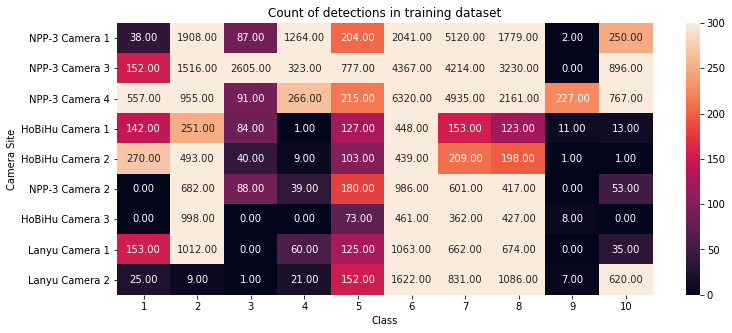

In [34]:
idl = np.hstack((np.arange(30598,30633),np.arange(30634,30638)))

forty = [112,180,272,285,330,447, 469, 474,498,500,517,527,545,550,622]
fortyone = [10, 33, 75, 82, 101, 114, 182, 183, 275, 279, 282, 291, 306, 325, 338, 380, 420, 424]

idl = np.hstack((idl,np.array(forty),np.array(fortyone)))
ids = movs[idl]
idss = ids[:,1]
sites = np.unique(idss)

dets = [None] * 9

for j, s in enumerate(sites):
    subset = ids[idss==s]
    idees = idl[idss==s]
    
    totcount = np.zeros(10)
    
    for v in idees:
        try:   gts = loadGT(movs[v][0], movs_length[v], partial=True)
        except:
            try:gts = loadGT(movs[v][0], movs_length[v], partial=False)
            except:gts = np.array(loadNewGT(movs[v][0], movs_length[v]))
        
        gts = gts[gts!=None]
                
        
        counts = np.histogram(gts,np.arange(0,12))[0]
        totcount += counts[1:]
        
    dets[j] = totcount
    
dets = np.array(dets)

cameras = ["NPP-3 Camera 1", "NPP-3 Camera 3",  "NPP-3 Camera 4",
           "HoBiHu Camera 1","HoBiHu Camera 2", "NPP-3 Camera 2",
           "HoBiHu Camera 3","Lanyu Camera 1",  "Lanyu Camera 2"]
plt.figure(figsize=(12,5))
sns.heatmap(dets,
            xticklabels=np.arange(1,11), 
            yticklabels=cameras, 
            vmin=0, vmax=300, 
            fmt='.2f', annot=True)
plt.xlabel("Class")
plt.ylabel("Camera Site")
plt.title("Count of detections in training dataset")
plt.show()

# location checking

In [25]:
count = 0
bad_boys = []
for i in np.arange(len(movs_length)):
    #if movs[i][0][41:43] == "04" and movs[i][1] == "46" :
    if movs_length[i] > 99700:# and movs[i][1] == "42" :
        bad_boys.append(i)
        print("Mov_id {0}, {1} have {2} detections".format(i,movs[i],movs_length[i]))
    if movs_length[i] == 0:
        count += 1
print("Empty videos: {0}".format(count))

Mov_id 48354, ['1f44781afd0701ab2bc751799e107ba7#201109062230' '44' '1'] have 103400 detections
Mov_id 217203, ['8c31f2332f6d6661ddc8b8c9c967dd63#201109052200' '44' '1'] have 99804 detections
Mov_id 247420, ['9fbd8da06c253c8546c4a3436ffa4e0e#201001010840' '38' '0'] have 201461 detections
Mov_id 263920, ['aa75290b85983f1836661ab737819243#201108221940' '46' '1'] have 102808 detections
Empty videos: 8493


In [4]:
get = False
id1 = 0;
id2 = 0;
for i, item in enumerate(movs):
    if (not get) and (item[0][:2] == "00"):
        print(i)
        id1 = i
        get = True
    if get and (item[0][:2] == "01"):
        print(i)
        id2 = i
        break
print(movs[id1-1])
print(movs[id1])
print(movs[id2-1])
print(movs[id2])

0
1584
['ffffc4037118c1fb585fd53c76a00f2d#201301121700' '37' '1']
['00000857dd49007f4a35abebb90aafe0#201110011530' '39' '0']
['00ffed7f2ce433d61a5b11456f2b6d39#201105011730' '40' '1']
['0100835177c8464620df5c5821d1ce5d#201106211550' '38' '0']


In [5]:
get = False
id1 = 0;
id2 = 0;
for i, item in enumerate(movs):
    if (not get) and (item[0][:3] == "13b"):
        print(i)
        id1 = i
        get = True
    if get and (item[0][:3] == "13c"):
        print(i)
        id2 = i
        break
print(movs[id1-1])
print(movs[id1])
print(movs[id2-1])
print(movs[id2])

30598
30695
['13af5ee11f80194b90df624b724cbfd7#201104041540' '41' '1']
['13b002807976fe6baf25398a889cf358#201206121450' '39' '1']
['13bf835042ad37aee7333c1cacbba3e9#201012191350' '41' '0']
['13c00c732c91d781afc8f24c2e63b372#201002091340' '42' '0']


In [6]:
naughty = []
for i, mov in enumerate(movs):
    hour = int(mov[0][41:43])
    month = mov[0][33:39]
    if ((hour > 18 or hour < 6) and (mov[1] == "44" or mov[1] == "46")) or movs_length[i] > 30000:
        naughty.append(i)
print(len(naughty))
print(np.sum(movs_length[naughty])/len(naughty))
print(np.sum(movs_length[naughty]))

4595
8072
37094711


In [4]:
naughty = []
for i, mov in enumerate(movs):
    hour = int(mov[0][41:43])
    month = mov[0][33:39]
    if movs_length[i] > 10000:
        naughty.append(i)
print(len(naughty))
print(np.sum(movs_length[naughty])/len(naughty))
print(np.sum(movs_length[naughty]))

10056
15226
153119563
